Code

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Exploratory Data Analysis (EDA)
# Display basic statistics and information about the dataset
print(data.describe())
print(data.info())

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Customer type'] = label_encoder.fit_transform(data['Customer type'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Product line'] = label_encoder.fit_transform(data['Product line'])
data['Payment'] = label_encoder.fit_transform(data['Payment'])

# Feature engineering
# Split the data into features and target variable
features = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Customer type', 'Gender', 'Product line', 'Payment']
target = 'Total'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(train_data[features], train_data[target])

# Make predictions on the test set
predictions = model.predict(test_data[features])

# Evaluate the model
mae = mean_absolute_error(test_data[target], predictions)
print(f'Mean Absolute Error: {mae}')

# Economic Order Quantity (EOQ) for inventory optimization
def calculate_eoq(demand, ordering_cost, holding_cost):
    eoq = ((2 * demand * ordering_cost) / holding_cost)**0.5
    return eoq

# Data needed for EOQ calculation is available
demand = data['Quantity'].sum()  # Total demand
ordering_cost = 500  # Set ordering cost
holding_cost = 0.1  # Set holding cost

# Calculate EOQ
eoq = calculate_eoq(demand, ordering_cost, holding_cost)
print(f'Optimal Reorder Quantity (EOQ): {eoq}')

# Just-In-Time (JIT) inventory management strategies
# Set reorder points based on demand variability and lead time
def calculate_reorder_point(demand, lead_time, demand_variability):
    safety_factor = 1.65  # Adjust based on business needs and risk tolerance
    reorder_point = demand * lead_time + safety_factor * demand_variability
    return reorder_point

# Data needed for JIT calculation is available
lead_time = 7  # Lead time in days
demand_variability = data['Quantity'].std()  # Standard deviation of demand
reorder_point = calculate_reorder_point(demand, lead_time, demand_variability)
print(f'Reorder Point (JIT): {reorder_point}')

# Feature Selection
# Feature Selection: Using feature importance ranking from RandomForestRegressor
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
selected_features = feature_importance_df['Feature'].tolist()[:5]  # Select top 5 important features
print('Selected Features:', selected_features)

# Model Selection and Model Training
# Model Selection: Utilizing Bagging Classifier, Random Forest Classifier, and AdaBoost Classifier
# Target variable 'Gender' (binary classification)
target_classification = 'Gender'

# Split the data into features and target variable for classification
classification_features = selected_features  # Use the selected features from feature selection
classification_target = target_classification

# Split the data into training and testing sets for classification
train_data_classification, test_data_classification = train_test_split(data, test_size=0.2, random_state=42)

# Model training for Bagging Classifier
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(train_data_classification[classification_features], train_data_classification[classification_target])

# Model training for Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_data_classification[classification_features], train_data_classification[classification_target])

# Model training for AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(train_data_classification[classification_features], train_data_classification[classification_target])

# Model Evaluation
# Evaluate Bagging Classifier
bagging_predictions = bagging_model.predict(test_data_classification[classification_features])
print('Bagging Classifier Metrics:')
print('Precision:', precision_score(test_data_classification[classification_target], bagging_predictions))
print('Recall:', recall_score(test_data_classification[classification_target], bagging_predictions))
print('F-1 Score:', f1_score(test_data_classification[classification_target], bagging_predictions))
print('Accuracy:', accuracy_score(test_data_classification[classification_target], bagging_predictions))
print('Classification Report:')
print(classification_report(test_data_classification[classification_target], bagging_predictions))

# Evaluate Random Forest Classifier
random_forest_predictions = random_forest_model.predict(test_data_classification[classification_features])
print('Random Forest Classifier Metrics:')
print('Precision:', precision_score(test_data_classification[classification_target], random_forest_predictions))
print('Recall:', recall_score(test_data_classification[classification_target], random_forest_predictions))
print('F-1 Score:', f1_score(test_data_classification[classification_target], random_forest_predictions))
print('Accuracy:', accuracy_score(test_data_classification[classification_target], random_forest_predictions))
print('Classification Report:')
print(classification_report(test_data_classification[classification_target], random_forest_predictions))

# Evaluate AdaBoost Classifier
adaboost_predictions = adaboost_model.predict(test_data_classification[classification_features])
print('AdaBoost Classifier Metrics:')
print('Precision:', precision_score(test_data_classification[classification_target], adaboost_predictions))
print('Recall:', recall_score(test_data_classification[classification_target], adaboost_predictions))
print('F-1 Score:', f1_score(test_data_classification[classification_target], adaboost_predictions))
print('Accuracy:', accuracy_score(test_data_classification[classification_target], adaboost_predictions))
print('Classification Report:')
print(classification_report(test_data_classification[classification_target], adaboost_predictions))

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

Correlation Matrix

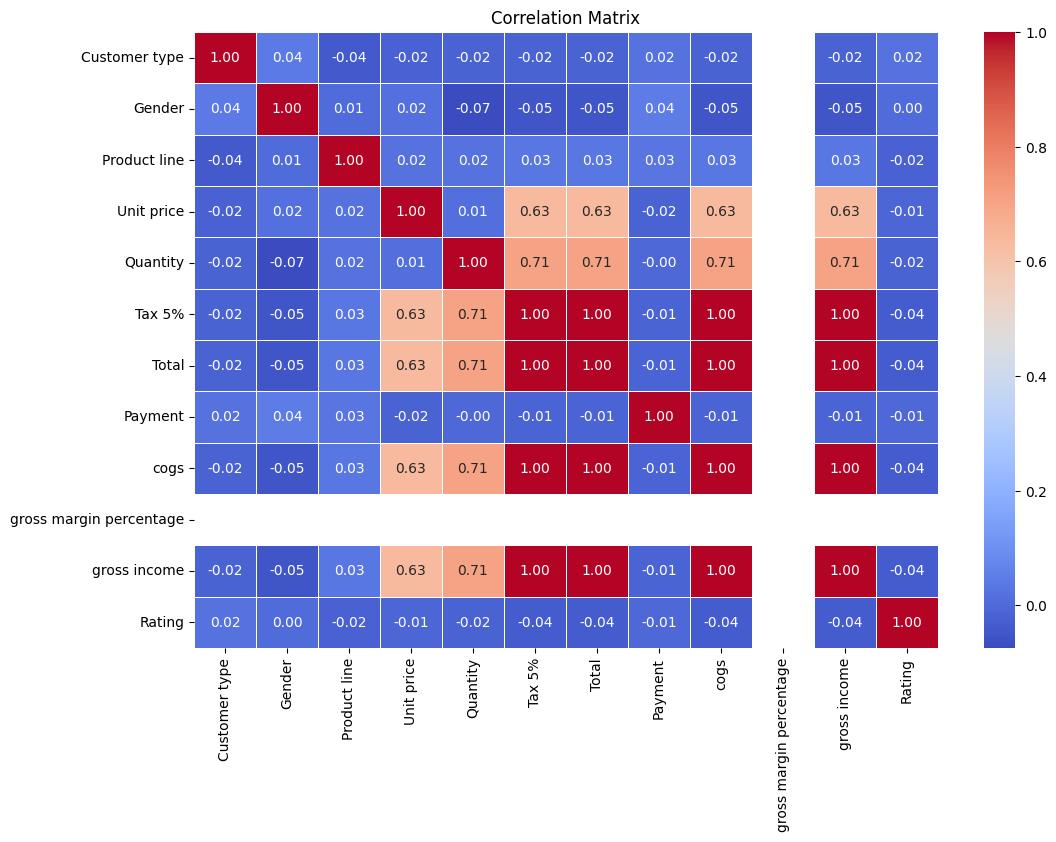

In [2]:
# Correlation Matrix
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Pairplot

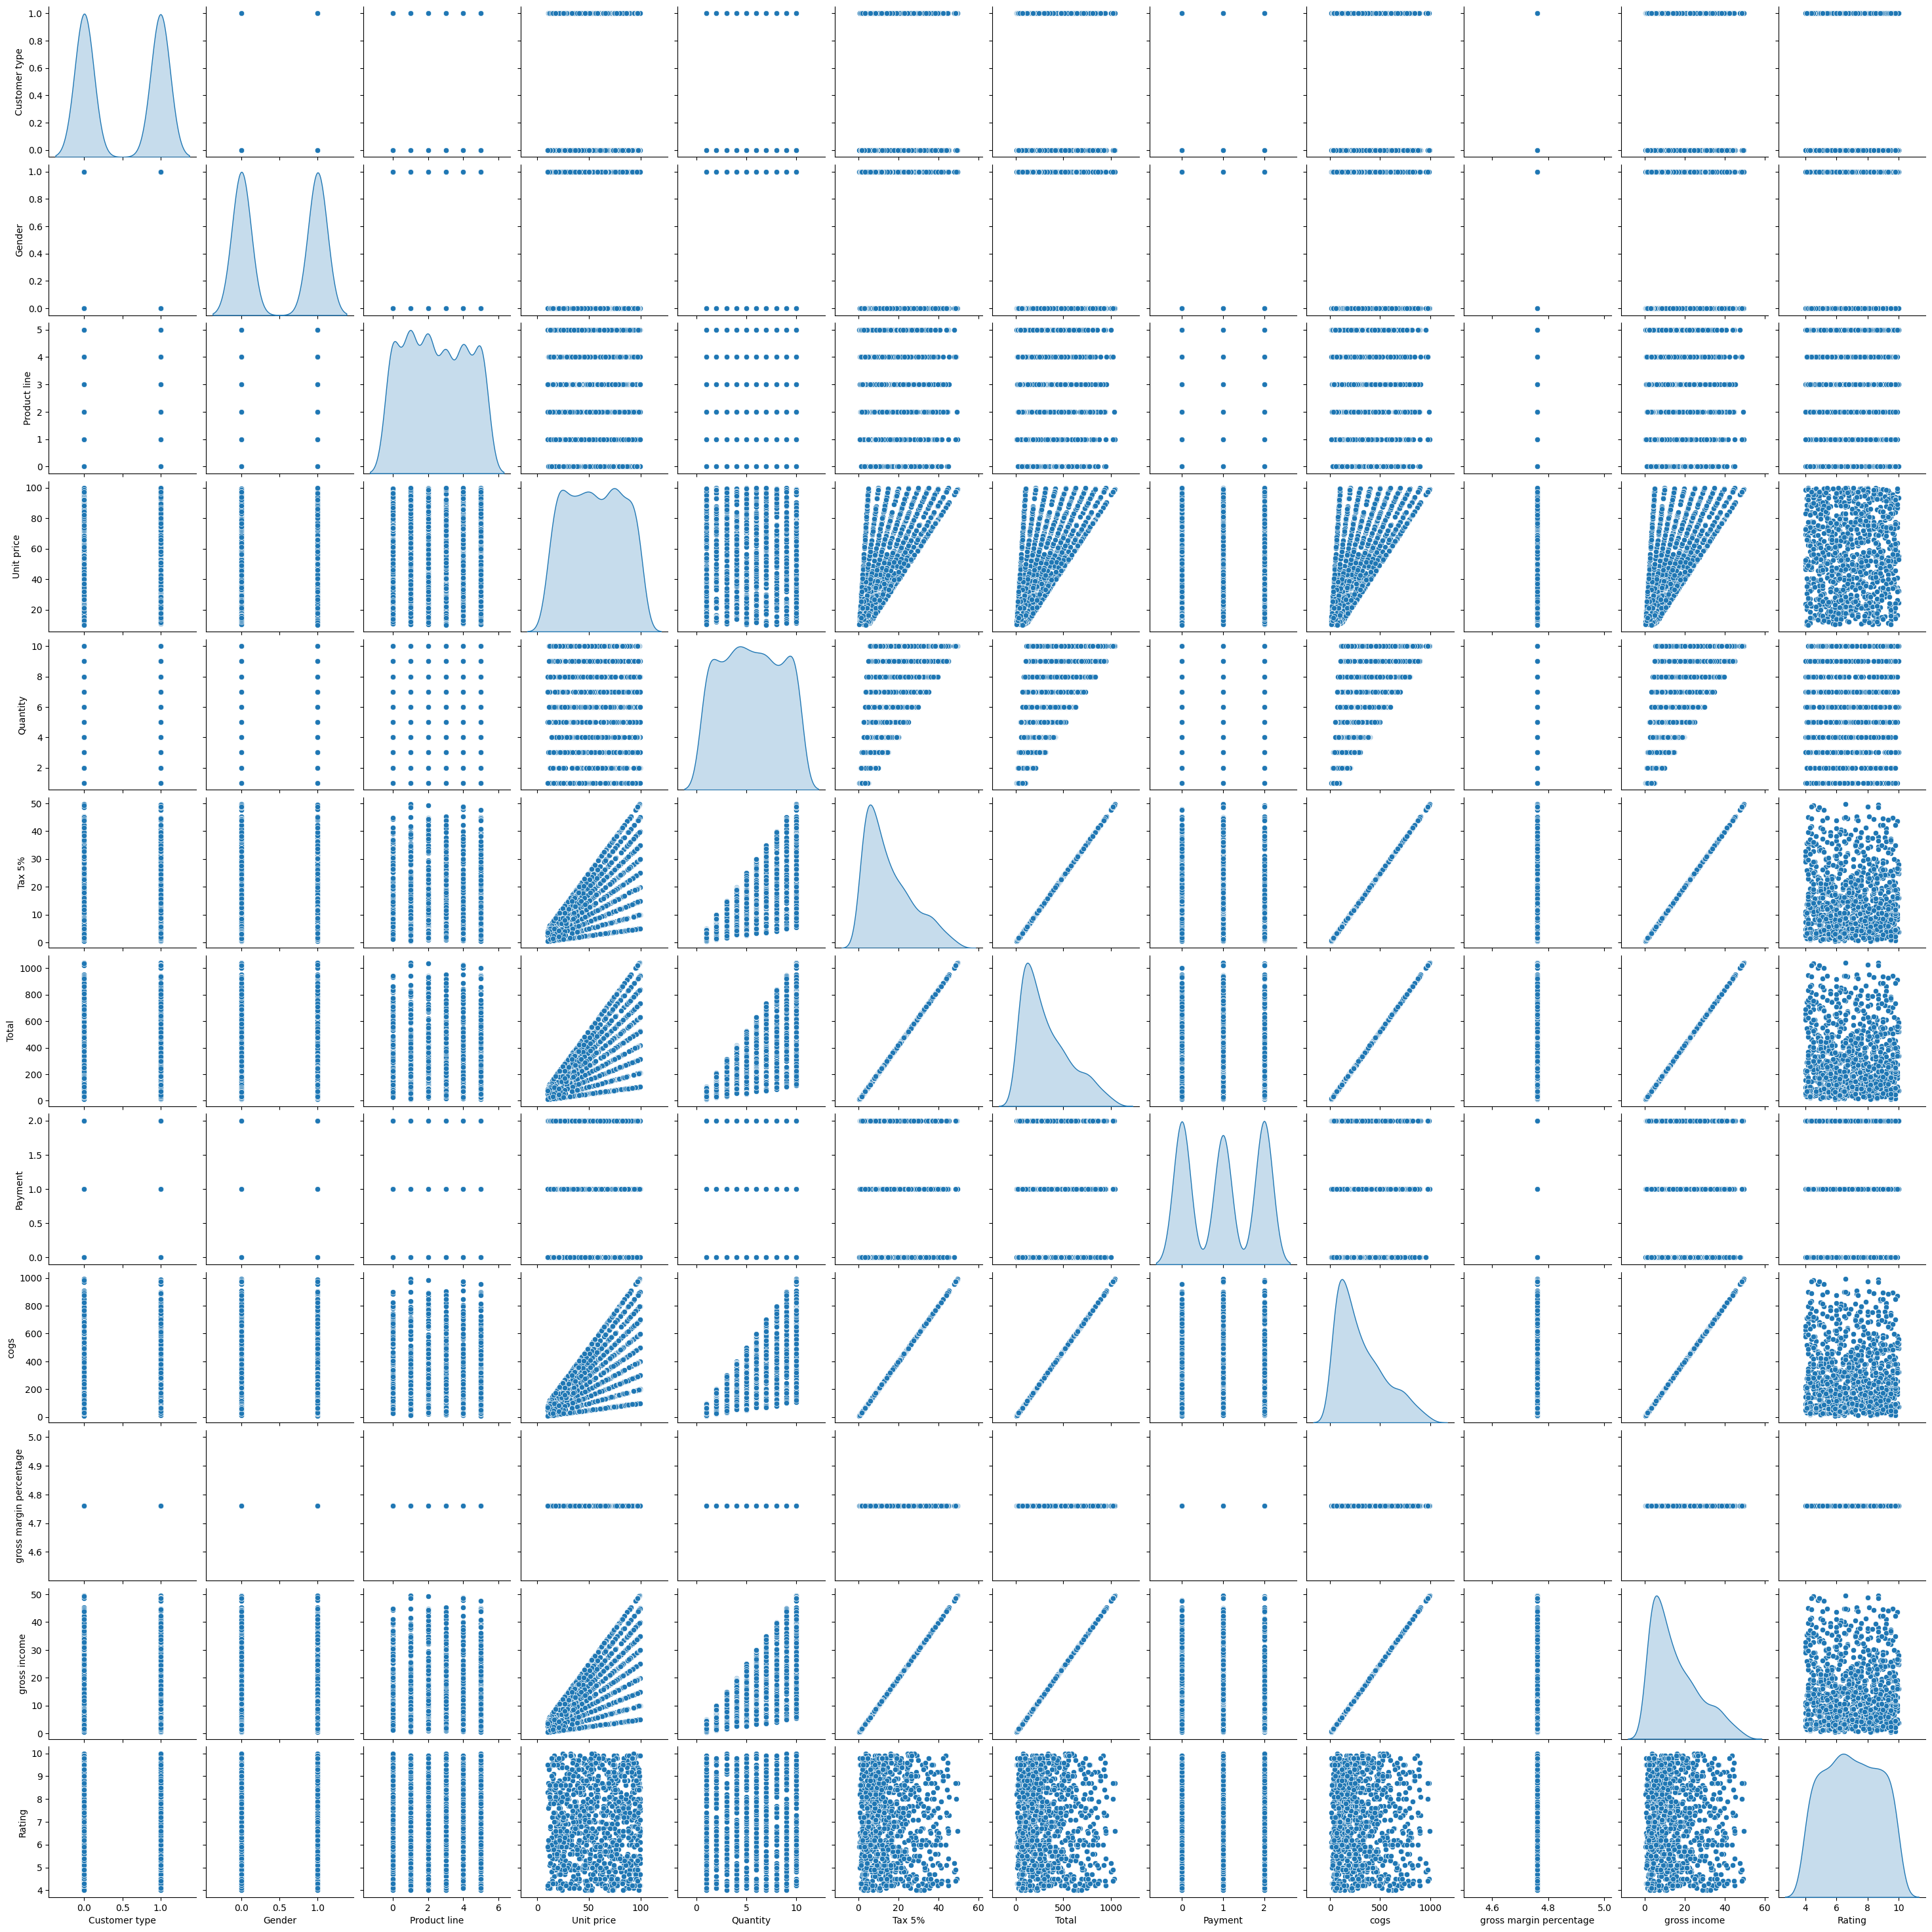

In [3]:
import seaborn as sns
sns.pairplot(data, diag_kind='kde')
plt.show()

Confusion Matrix

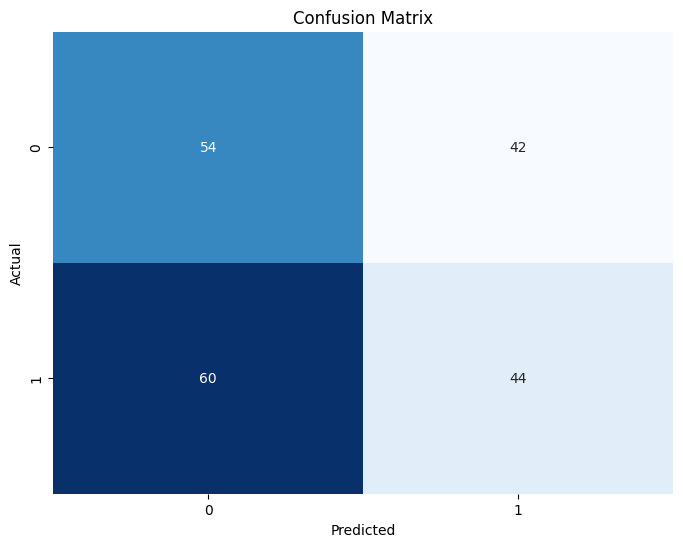

In [4]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_data_classification[classification_target], bagging_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Precision Recall Curve

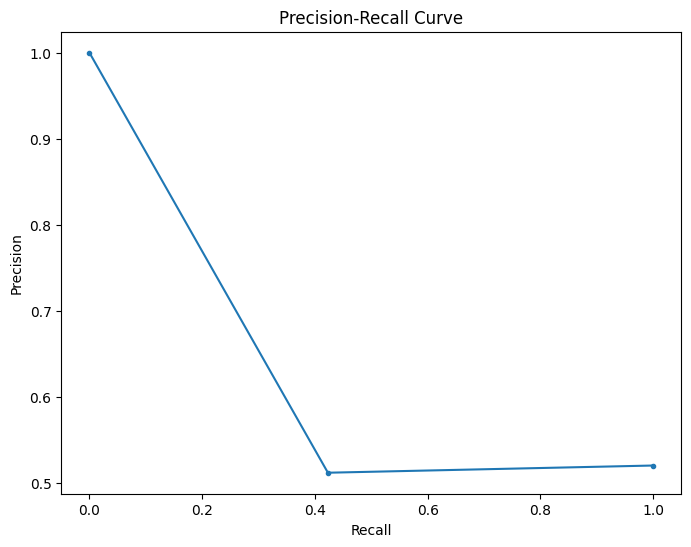

['sales_forecasting_model.joblib']

In [5]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(test_data_classification[classification_target], bagging_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Save the trained model for future use
import joblib

# Save the model to a file
joblib.dump(model, 'sales_forecasting_model.joblib')


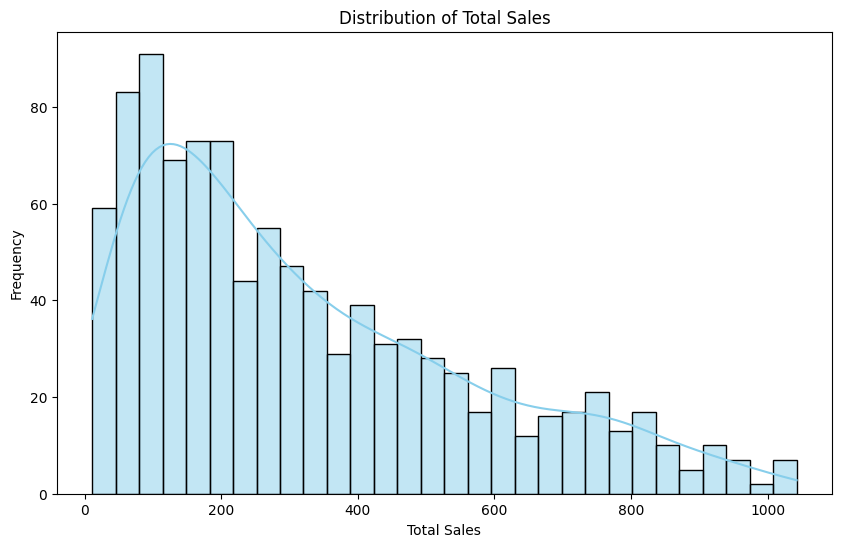

In [6]:
# Distribution of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

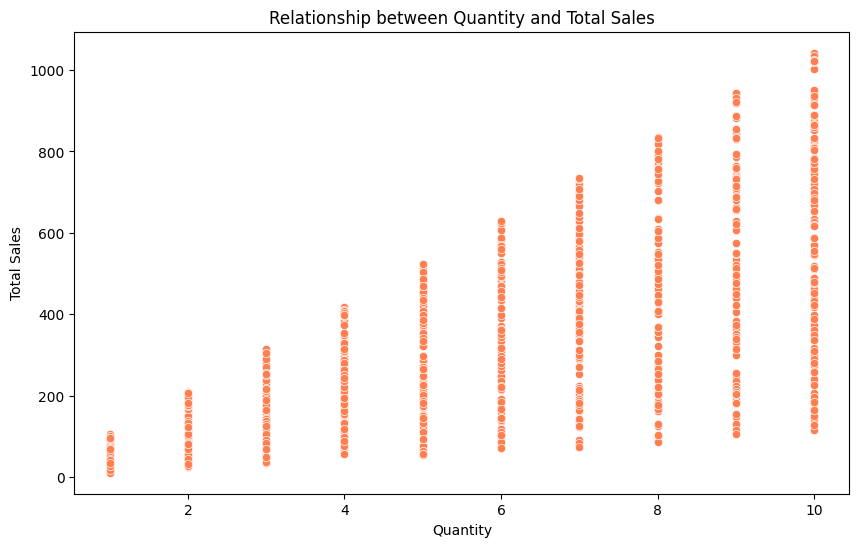

In [7]:
# Relationship between Quantity and Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=data, color='coral')
plt.title('Relationship between Quantity and Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

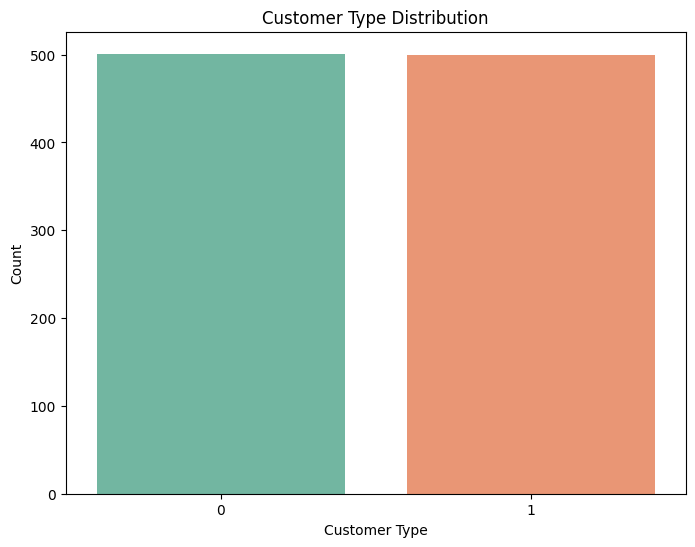

In [8]:
# Customer Type Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=data, palette='Set2')
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

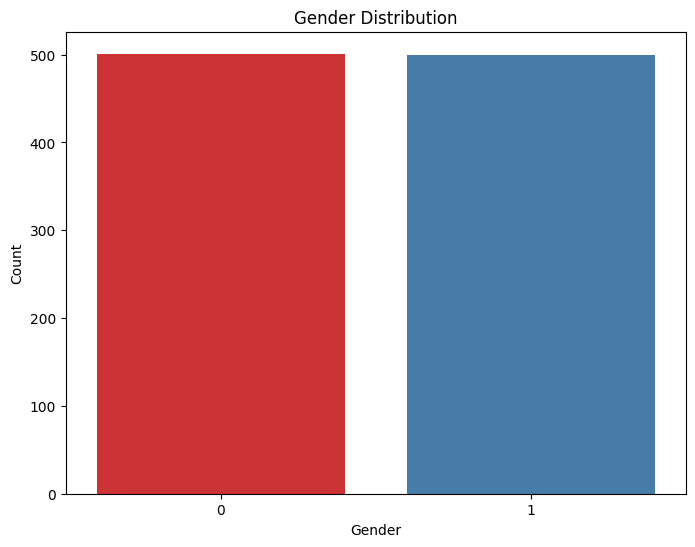

In [9]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

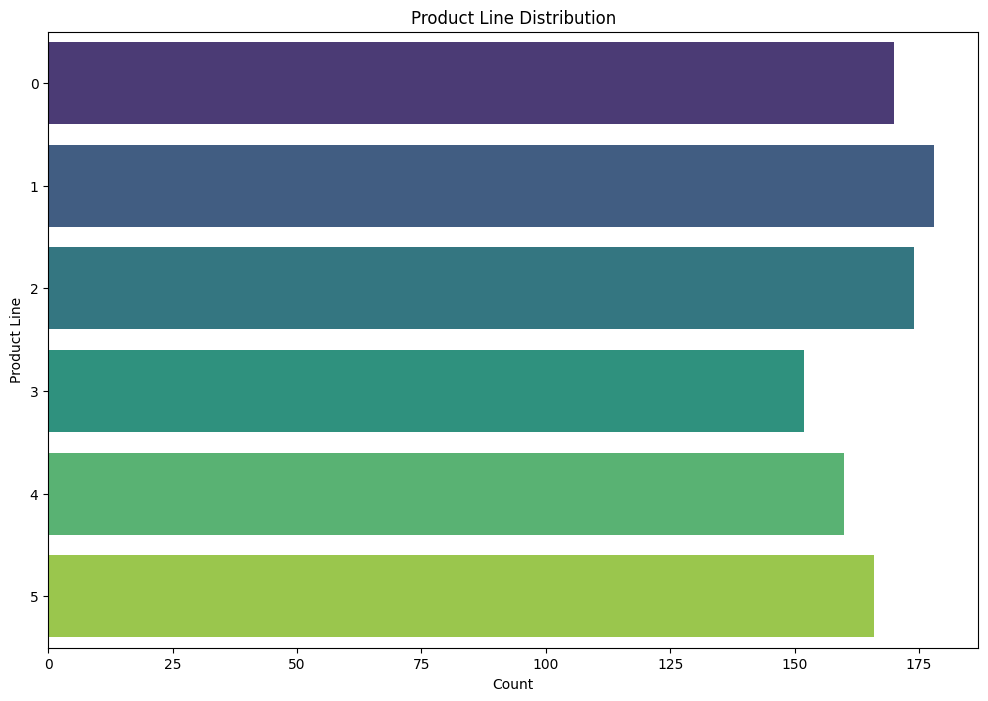

In [10]:
# Product Line Analysis
plt.figure(figsize=(12, 8))
sns.countplot(y='Product line', data=data, palette='viridis')
plt.title('Product Line Distribution')
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()

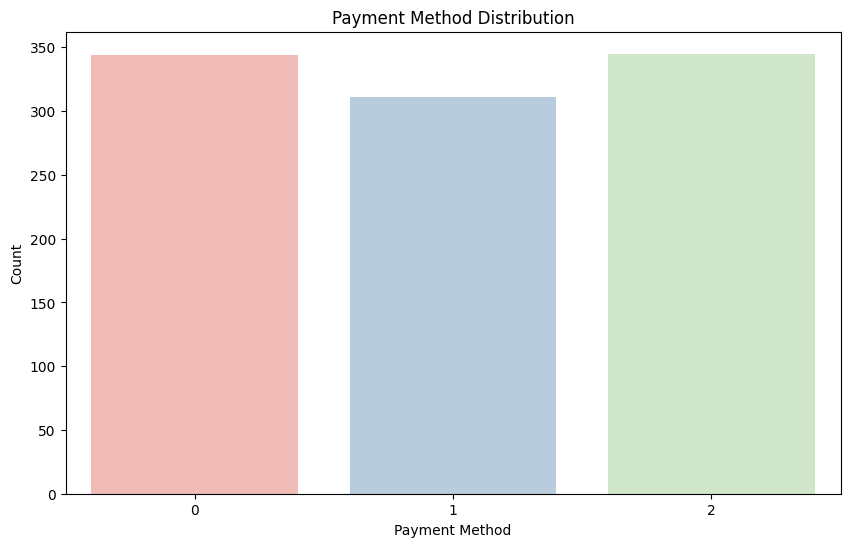

In [12]:
# Payment Method Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=data, palette='Pastel1')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


<Figure size 1500x1000 with 0 Axes>

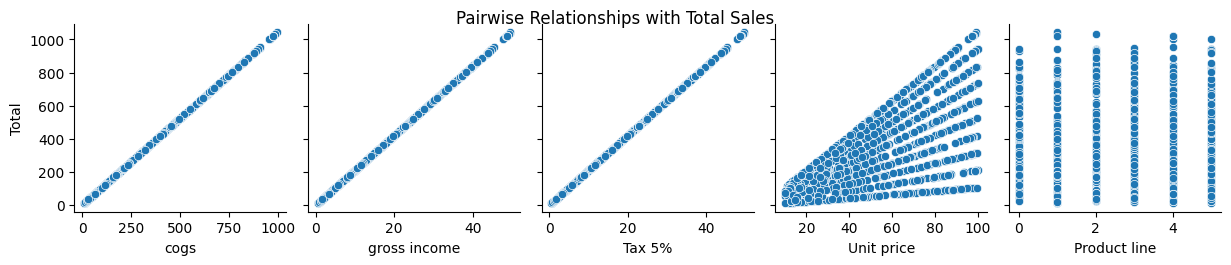

In [13]:
# Pairwise Relationships with Target Variable 'Total'
plt.figure(figsize=(15, 10))
sns.pairplot(data, x_vars=selected_features, y_vars=['Total'], kind='scatter', palette='husl')
plt.suptitle('Pairwise Relationships with Total Sales', y=1.02)
plt.show()